# Aula 1 - Python em Aplicações ambientais

Importar pandas para ler o arquivo .CSV

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\marcos perrude\Documents\ENS410064\dados\PRcsv.csv", encoding='latin1')


In [19]:
df 

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
262105,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
262106,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
262107,2023,12,30,22,0,SIX,PR_013,SO2,insufic,ppb,Automatico,referencia
262108,2023,12,30,23,0,SIX,PR_013,SO2,insufic,ppb,Automatico,referencia


In [20]:
df.dtypes

Ano          int64
Mes          int64
Dia          int64
Hora         int64
Minuto       int64
Estacao     object
Codigo      object
Poluente    object
Valor       object
Unidade     object
Tipo        object
Testacao    object
dtype: object

Transformar a coluna 'Valor' em Float e retirar as cedulas com 'insufic'

In [21]:
df['Valor'] = df['Valor'].replace(['insufic'], np.nan)
df['Valor'] = df['Valor'].astype('float')

In [22]:
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
262105,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
262106,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
262107,2023,12,30,22,0,SIX,PR_013,SO2,NaN,ppb,Automatico,referencia
262108,2023,12,30,23,0,SIX,PR_013,SO2,NaN,ppb,Automatico,referencia


In [23]:
df.dtypes

Ano           int64
Mes           int64
Dia           int64
Hora          int64
Minuto        int64
Estacao      object
Codigo       object
Poluente     object
Valor       float64
Unidade      object
Tipo         object
Testacao     object
dtype: object

In [8]:
df.describe()

,Ano,Mes,Dia,Hora,Minuto,Valor
count,262110.0,262110.000000,262110.000000,262110.000000,262110.0,181817.000000
mean,2023.0,6.511617,15.680325,11.498684,0.0,12.651441
std,0.0,3.440920,8.772784,6.922897,0.0,16.180363
min,2023.0,1.000000,1.000000,0.000000,0.0,0.000000
25%,2023.0,4.000000,8.000000,5.000000,0.0,1.640000
50%,2023.0,7.000000,16.000000,11.000000,0.0,7.480000
75%,2023.0,10.000000,23.000000,17.000000,0.0,17.250000
max,2023.0,12.000000,31.000000,23.000000,0.0,239.630000


Perguntas : 
A - Qual a média da sua série de dados? r:  12.651441

B - Qual o valor do meio (percentil 50%)? r: 7,48

C- Qual a faixa de valores entre os percentis 25% e 75%? r: Faixa de valores de 1.64(25%) ate 17.25(75%)

In [24]:
df['datetime'] = pd.to_datetime(df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')

In [25]:
df = df.set_index("datetime")

In [26]:
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 20:00:00,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
2023-12-30 21:00:00,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
2023-12-30 22:00:00,2023,12,30,22,0,SIX,PR_013,SO2,NaN,ppb,Automatico,referencia


In [28]:
df_PR012= df.query('Codigo == "PR_012"')

In [29]:
df_PR012

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 20:00:00,2023,12,30,20,0,CIC,PR_012,PM10,30.69,µg/m3,Automatico,referencia
2023-12-30 21:00:00,2023,12,30,21,0,CIC,PR_012,PM10,30.40,µg/m3,Automatico,referencia
2023-12-30 22:00:00,2023,12,30,22,0,CIC,PR_012,PM10,NaN,µg/m3,Automatico,referencia


In [30]:
df_co = df_PR012[df_PR012['Poluente'] == 'CO']

In [16]:
df_co


,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
218420,2023,12,30,20,0,SIX,PR_013,CO,0.54,ppm,Automatico,referencia
218421,2023,12,30,21,0,SIX,PR_013,CO,0.45,ppm,Automatico,referencia
218422,2023,12,30,22,0,SIX,PR_013,CO,NaN,ppm,Automatico,referencia
218423,2023,12,30,23,0,SIX,PR_013,CO,NaN,ppm,Automatico,referencia


<Axes: xlabel='datetime'>

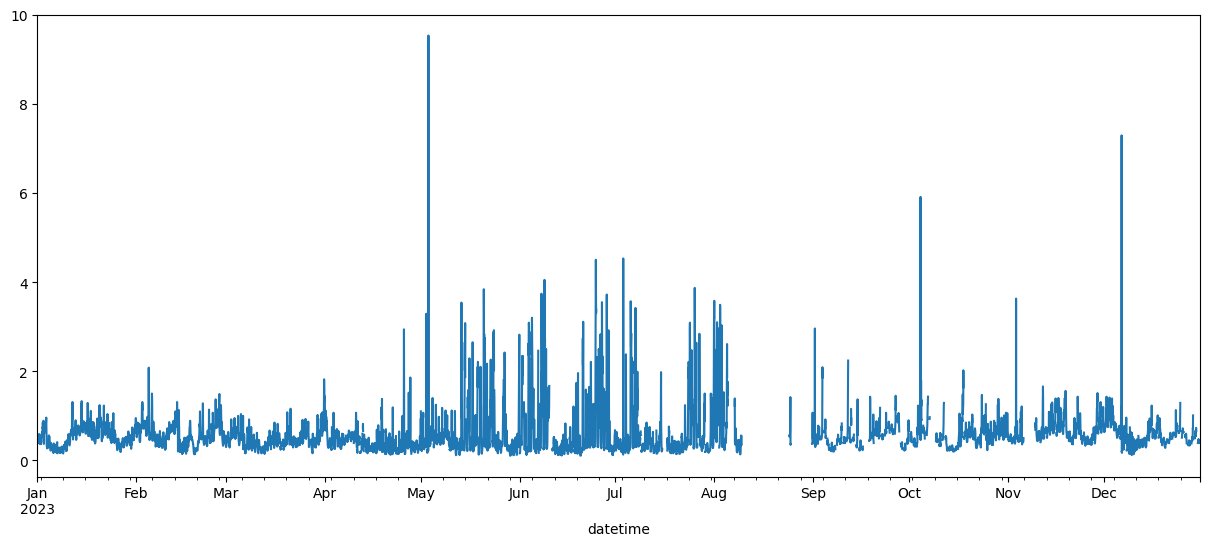

In [34]:
plt.figure(figsize=(15,6))
df_co['Valor'].plot()

In [37]:
df_co['Valor'].max()

np.float64(9.53)

In [9]:
df.groupby(by = ['Codigo'])[['Valor']].mean()

,Valor
Codigo,
PR_002,13.684943
PR_005,7.823165
PR_008,12.949507
PR_009,13.731484
PR_010,13.069958
PR_012,12.680549
PR_013,12.268745


In [75]:
df.groupby(by = ['Poluente'])[['Valor']].mean()

,Valor
Poluente,
CO,0.733944
NO2,12.074993
O3,17.584227
PM10,24.279240
PM25,11.515872
PTS,31.296220
SO2,4.298832


In [64]:
df.loc[df['Poluente'] =='SO2'] ['Valor']

datetime
2023-01-01 00:00:00    1.91
2023-01-01 01:00:00    1.86
2023-01-01 02:00:00    6.09
2023-01-01 03:00:00    2.31
2023-01-01 04:00:00    0.89
                       ... 
2023-12-30 20:00:00    2.88
2023-12-30 21:00:00    3.27
2023-12-30 22:00:00     NaN
2023-12-30 23:00:00     NaN
2023-12-31 00:00:00     NaN
Name: Valor, Length: 34948, dtype: float64